In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=LJHTRVJ6TEMRLDXI'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2023-08-23', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-08-23': {'1. open': '178.5200', '2. high': '181.5500', '3. low': '178.3250', '4. close': '181.1200', '5. volume': '52722752'}, '2023-08-22': {'1. open': '177.0600', '2. high': '177.6800', '3. low': '176.2500', '4. close': '177.2300', '5. volume': '42084245'}, '2023-08-21': {'1. open': '175.0700', '2. high': '176.1300', '3. low': '173.7350', '4. close': '175.8400', '5. volume': '46311879'}, '2023-08-18': {'1. open': '172.3000', '2. high': '175.1000', '3. low': '171.9600', '4. close': '174.4900', '5. volume': '61172150'}, '2023-08-17': {'1. open': '177.1400', '2. high': '177.5054', '3. low': '173.4800', '4. close': '174.0000', '5. volume': '66062882'}, '2023-08-16': {'1. open': '177.1300', '2. high': '178.5400', '3. low': '176.5000', '4. close': '176.5700', 

In [3]:

# Extract Time Series data
time_series_data = data['Time Series (Daily)']

# Convert to DataFrame
APPL_stocks_df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Rename columns for clarity
APPL_stocks_df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Convert columns to appropriate data types
APPL_stocks_df = APPL_stocks_df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

# Convert index (date) to datetime
APPL_stocks_df.index = pd.to_datetime(APPL_stocks_df.index)

# Data Exploration:

In [4]:
APPL_stocks_df.tail()

,Open,High,Low,Close,Volume
1999-11-05,84.62,88.37,84.00,88.31,3721500
1999-11-04,82.06,85.37,80.62,83.62,3384700
1999-11-03,81.62,83.25,81.00,81.50,2932700
1999-11-02,78.00,81.69,77.31,80.25,3564600
1999-11-01,80.00,80.69,77.37,77.62,2487300


In [5]:
APPL_stocks_df.describe()

,Open,High,Low,Close,Volume
count,5991.000000,5991.000000,5991.000000,5991.000000,5.991000e+03
mean,173.243897,175.178427,171.201128,173.246758,3.188148e+07
std,150.528072,151.770370,149.081857,150.462231,3.012207e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,72.055000,72.815000,71.040000,71.868500,1.137265e+07
50%,132.430000,134.180000,130.400000,132.300000,2.334630e+07
75%,200.705000,202.790000,198.680000,200.638000,4.134459e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


In [6]:
# Check for missing values in the DataFrame
missing_values = APPL_stocks_df.isna()
# Sum the missing values for each column
missing_sum = missing_values.sum()
missing_sum

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Cleaning:

# Data Visualization:

# line chart of closing prices using Matplotlib

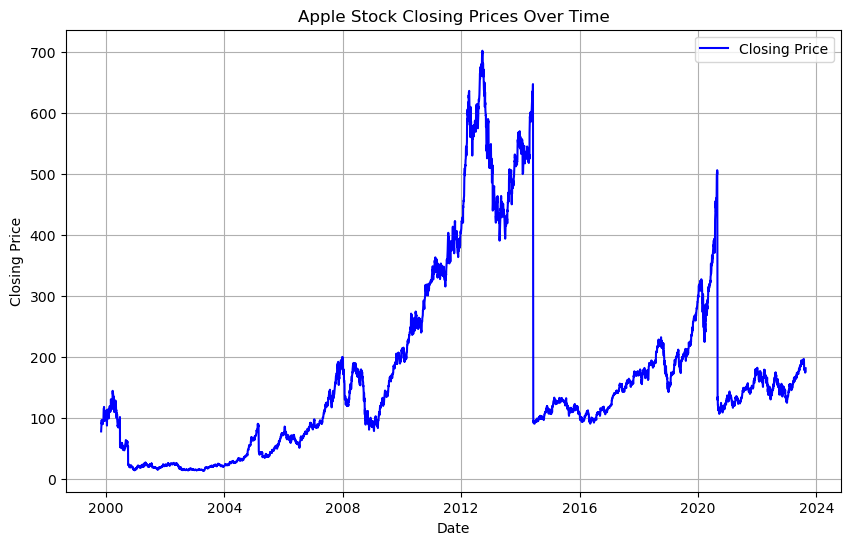

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Basic Statistics

In [8]:
import pandas as pd

# Compute basic statistics
mean_values = APPL_stocks_df.mean()
median_values = APPL_stocks_df.median()
std_dev_values = APPL_stocks_df.std()

print("Mean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)


Mean Values:
Open      1.732439e+02
High      1.751784e+02
Low       1.712011e+02
Close     1.732468e+02
Volume    3.188148e+07
dtype: float64

Median Values:
Open           132.43
High           134.18
Low            130.40
Close          132.30
Volume    23346300.00
dtype: float64

Standard Deviation Values:
Open      1.505281e+02
High      1.517704e+02
Low       1.490819e+02
Close     1.504622e+02
Volume    3.012207e+07
dtype: float64


The values you received represent the mean, median, and standard deviation for each of the stock attributes in your DataFrame (APPL_stocks_df). Here's what each of these statistics indicates:

Mean Values:
The mean (average) values for each attribute represent the central tendency of the data. For example, for the 'Open' attribute, the mean value is approximately 173.24, which means that the average opening price over the given time period is around $173.24.

Median Values:
The median values for each attribute represent the middle value when the data is sorted. It's a measure of central tendency that is not affected by outliers. For the 'High' attribute, the median value is approximately 134.17, which indicates that half of the recorded high prices are above this value and half are below.

Standard Deviation Values:
The standard deviation measures the dispersion or variability of the data points around the mean. A larger standard deviation indicates greater variability, while a smaller standard deviation indicates less variability. For the 'Low' attribute, the standard deviation is approximately 149.09, indicating that the low prices have a relatively high variability around the mean.

# Candlestick chart: 
shows the open, high, low, and close prices for each trading day. This can provide insights into price movements within each day.A candlestick chart, also known as a Japanese candlestick chart, is a type of financial chart used to represent the price movements of an asset (such as a stock) over a specific time period, often a single trading day. It displays the opening, closing, high, and low prices of the asset for each time interval. Candlestick charts provide valuable insights into price trends and patterns within a trading day.

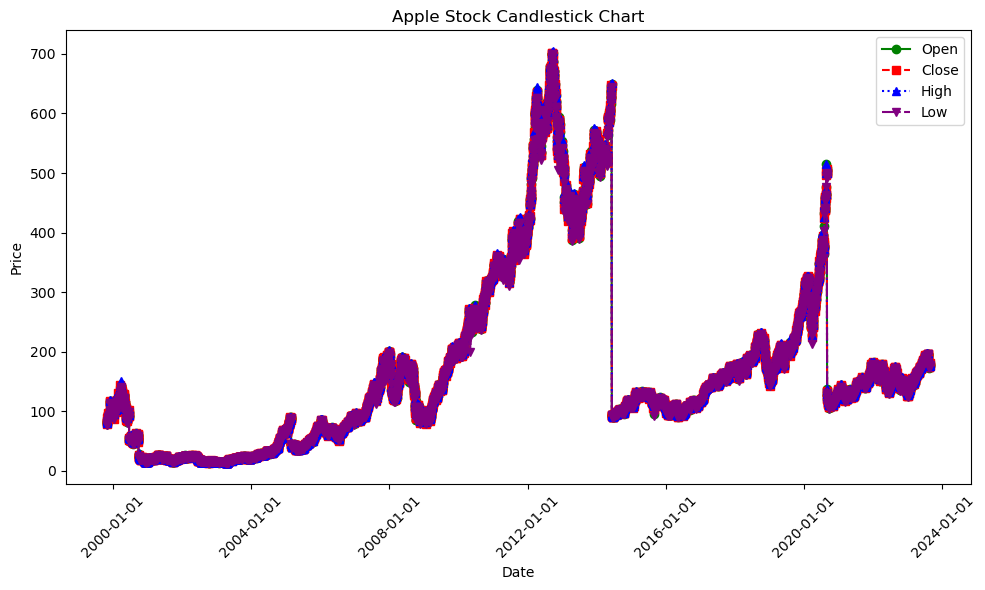

In [22]:
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

# Assuming APPL_stocks_df contains the stock data

fig, ax = plt.subplots(figsize=(10, 6))

# Create a candlestick chart with different markers, linestyles, and colors for open, close, high, and low
candlestick = ax.plot(APPL_stocks_df.index, APPL_stocks_df['Open'], marker='o', linestyle='-', color='green', label='Open')
candlestick += ax.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], marker='s', linestyle='--', color='red', label='Close')
candlestick += ax.plot(APPL_stocks_df.index, APPL_stocks_df['High'], marker='^', linestyle=':', color='blue', label='High')
candlestick += ax.plot(APPL_stocks_df.index, APPL_stocks_df['Low'], marker='v', linestyle='-.', color='purple', label='Low')

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Apple Stock Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

# Correlation Heatmap:
Use a heatmap to visualize the correlation matrix between different stock attributes. Positive values indicate positive correlation, negative values indicate negative correlation, and values close to 0 indicate weak or no correlation.

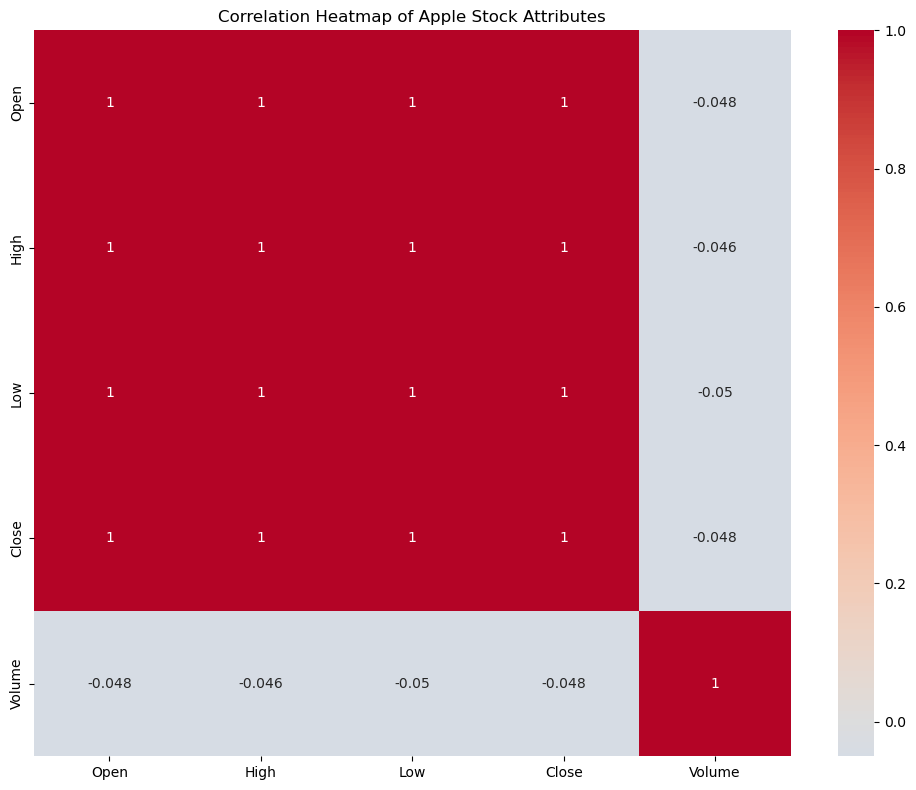

In [10]:
# Calculate the correlation matrix
correlation_matrix = APPL_stocks_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Apple Stock Attributes')
plt.tight_layout()

plt.show()

# Volume Chart:
Visualize the trading volume over time using a bar chart. This can help you identify periods of high trading activity.

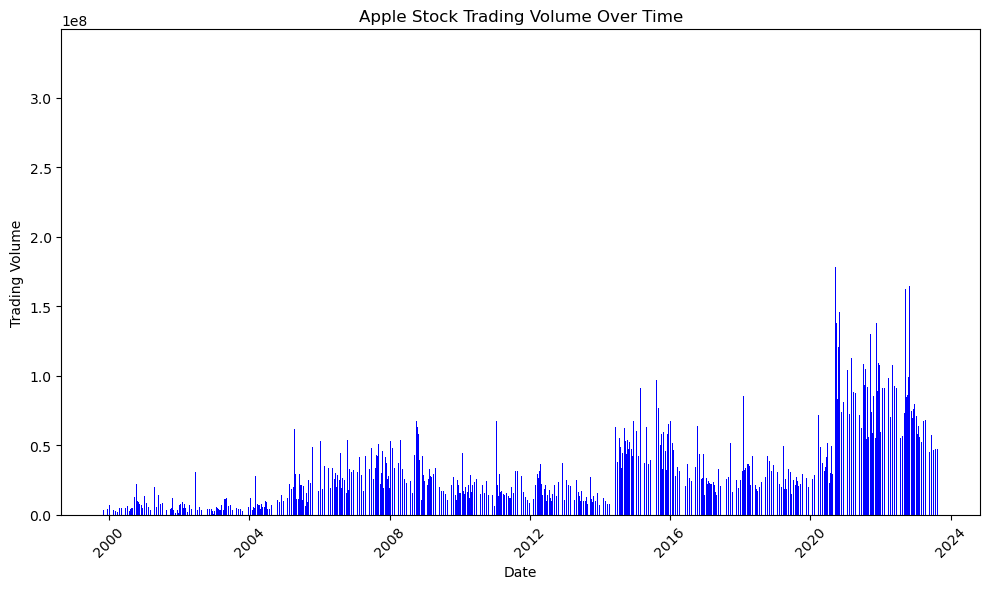

In [11]:
# Create the volume chart using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(APPL_stocks_df.index, APPL_stocks_df['Volume'], color='blue')
plt.title('Apple Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Moving Averages:
A moving average is a commonly used technical indicator that helps smooth out price data over a specified period of time. It provides a clearer picture of the overall trend by reducing short-term fluctuations and noise in the price chart.
Plot moving averages (e.g., 50-day and 200-day moving averages) along with the actual stock prices to observe trends more clearly.This example calculates both the 50-day and 200-day moving averages using the rolling() function and then plots the actual stock prices along with these moving averages. The different lines on the plot allow you to observe trends more clearly and identify potential crossovers or patterns.

Moving averages can help traders and investors in several ways:

Trend Identification: Moving averages are often used to identify the direction of the trend. If the stock's price is consistently above its moving average, it could indicate an uptrend, and vice versa for a downtrend.

Support and Resistance Levels: Moving averages can act as dynamic support and resistance levels. In an uptrend, the moving average might act as a support level, and in a downtrend, as a resistance level.

Crossovers: When a shorter-term moving average crosses above a longer-term moving average, it's often considered a bullish signal, suggesting potential upward momentum. Conversely, a crossover where the shorter-term moving average crosses below the longer-term one can be seen as a bearish signal.

Reversal Indicators: Changes in the relationship between price and moving averages can indicate potential trend reversals. For instance, if a stock that has been trending downward crosses above its moving average, it might signal a reversal.

The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend. A crossover to the downside of the 200-day moving average is interpreted as bearish.

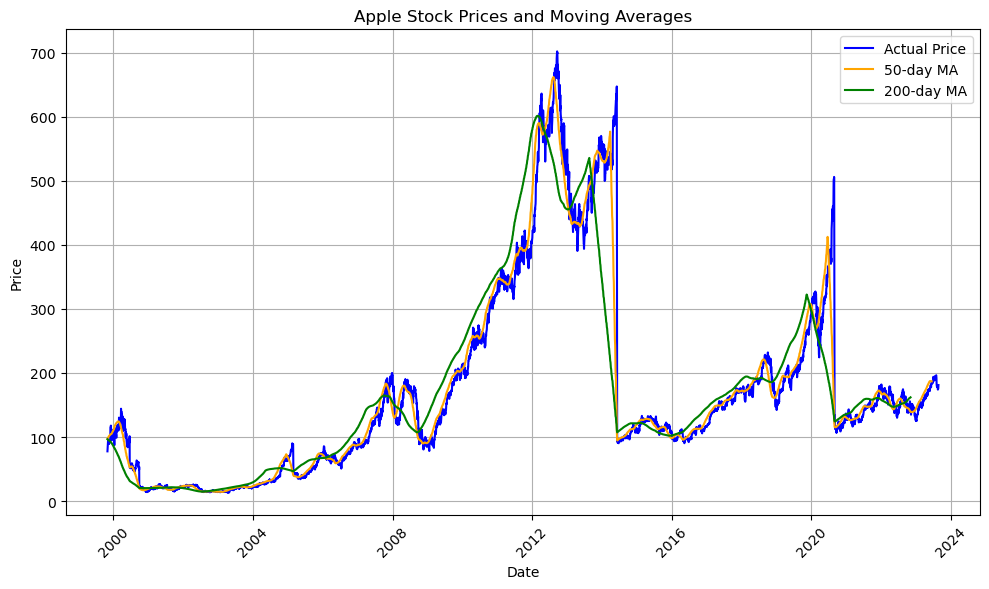

In [12]:
# Calculate moving averages
APPL_stocks_df['50-day MA'] = APPL_stocks_df['Close'].rolling(window=50).mean()
APPL_stocks_df['200-day MA'] = APPL_stocks_df['Close'].rolling(window=200).mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Actual Price', color='blue')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['50-day MA'], label='50-day MA', color='orange')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['200-day MA'], label='200-day MA', color='green')
plt.title('Apple Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Volatility Visualization:
Plot the range between high and low prices over time to visualize stock price volatility.This example calculates the price range (volatility) between high and low prices for each date and then plots the price range over time. The y-axis represents the price range, and the x-axis represents the dates. This allows you to visually observe periods of high and low volatility in the stock's price movements.

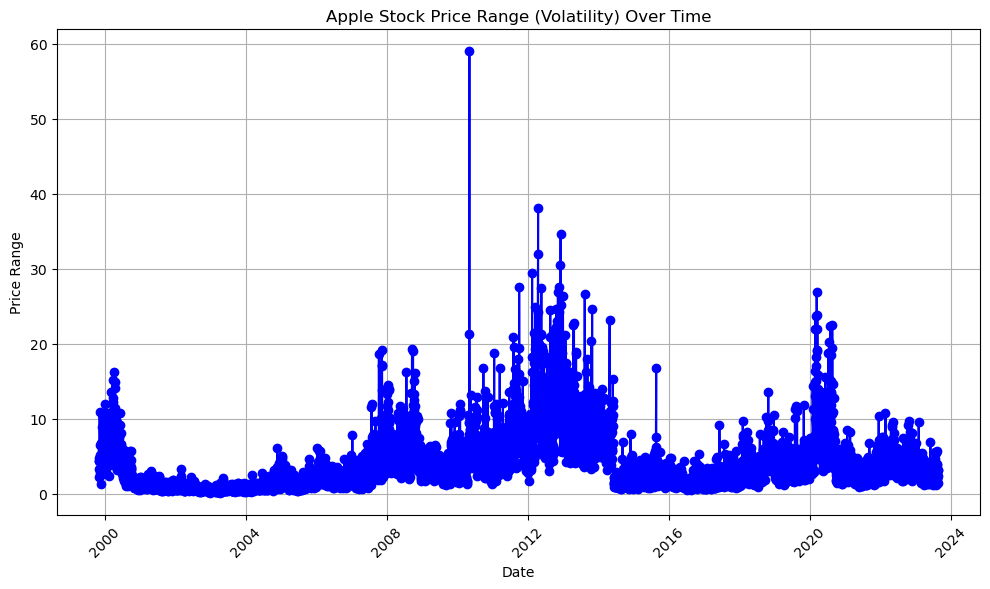

In [13]:
# Calculate the range (volatility) between high and low prices
APPL_stocks_df['Price Range'] = APPL_stocks_df['High'] - APPL_stocks_df['Low']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Price Range'], marker='o', linestyle='-', color='blue')
plt.title('Apple Stock Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [14]:
# Calculate statistical measures
average_volatility = APPL_stocks_df['Price Range'].mean()
median_volatility = APPL_stocks_df['Price Range'].median()
std_deviation_volatility = APPL_stocks_df['Price Range'].std()

# Print the results
print(f"Average Volatility: {average_volatility:.2f}")
print(f"Median Volatility: {median_volatility:.2f}")
print(f"Standard Deviation of Volatility: {std_deviation_volatility:.2f}")


Average Volatility: 3.98
Median Volatility: 2.74
Standard Deviation of Volatility: 3.89


# Performance Metrics:

Calculate metrics like daily returns and cumulative returns to assess the stock's historical performance. Calculating daily returns and cumulative returns are important steps to assess the historical performance of a stock.
This example calculates both the daily returns and cumulative returns using the pct_change() function and the cumulative product. It then creates two subplots: one for visualizing daily returns and another for cumulative returns. The y-axes represent the respective returns, and the x-axes represent the dates.

.pct_change(): This is a method applied to the 'Close' column. It calculates the percentage change between consecutive values. In this case, it calculates the daily percentage change in the closing prices.

The concept of daily returns is essential in finance and investing. It allows analysts and investors to assess the performance of a stock or other financial instrument over time. Positive daily returns indicate price increases, while negative daily returns indicate price decreases. By analyzing these returns, investors can evaluate volatility, trends, and make informed decisions about trading or investment strategies.

.cumprod(): This is a cumulative product function. It calculates the cumulative product of the series of values obtained from adding 1 to the daily returns. Essentially, it multiplies each value in the series with the previous products. This step simulates the growth of an initial investment over time based on the daily returns.

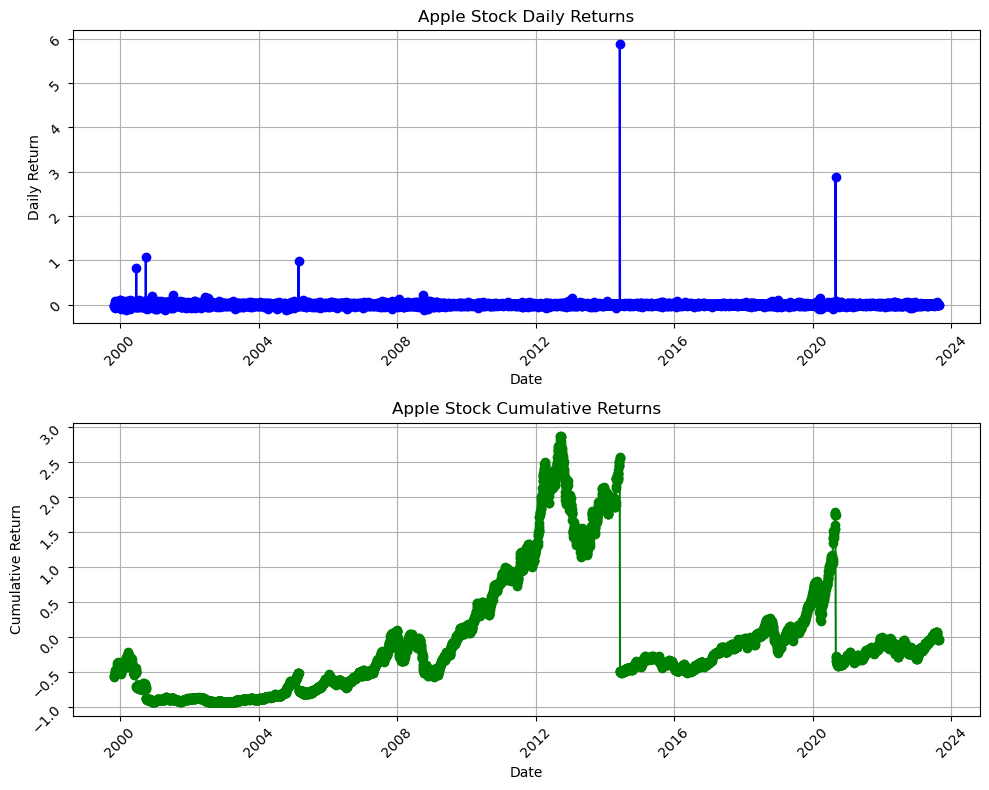

In [15]:
# Calculate daily returns
APPL_stocks_df['Daily Return'] = APPL_stocks_df['Close'].pct_change()

# Calculate cumulative returns
APPL_stocks_df['Cumulative Return'] = (1 + APPL_stocks_df['Daily Return']).cumprod() - 1

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot daily returns
axes[0].plot(APPL_stocks_df.index, APPL_stocks_df['Daily Return'], marker='o', linestyle='-', color='blue')
axes[0].set_title('Apple Stock Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

# Plot cumulative returns
axes[1].plot(APPL_stocks_df.index, APPL_stocks_df['Cumulative Return'], marker='o', linestyle='-', color='green')
axes[1].set_title('Apple Stock Cumulative Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()


# Time series analysis involves examining data points collected at regular intervals over time to identify patterns, trends, and seasonality. Here's how you can explore time series patterns and seasonality in your data using Python's Pandas, Matplotlib, and StatsModels libraries:
Autocorrelation:
Autocorrelation measures the correlation between a time series and a lagged version of itself. It's useful for identifying repeating patterns in the data.
Seasonal Decomposition:
Seasonal decomposition separates a time series into trend, seasonal, and residual components. It helps in understanding the underlying patterns and seasonality in the data.

In [16]:
# Remove columns 
columns_to_remove = ['50-day MA', '200-day MA', 'Price Range', 'Daily Return', 'Cumulative Return']
APPL_stocks_df.drop(columns=columns_to_remove, inplace=True)
APPL_stocks_df

,Open,High,Low,Close,Volume
2023-08-23,178.52,181.5500,178.325,181.12,52722752
2023-08-22,177.06,177.6800,176.250,177.23,42084245
2023-08-21,175.07,176.1300,173.735,175.84,46311879
2023-08-18,172.30,175.1000,171.960,174.49,61172150
2023-08-17,177.14,177.5054,173.480,174.00,66062882
...,...,...,...,...,...
1999-11-05,84.62,88.3700,84.000,88.31,3721500
1999-11-04,82.06,85.3700,80.620,83.62,3384700
1999-11-03,81.62,83.2500,81.000,81.50,2932700
1999-11-02,78.00,81.6900,77.310,80.25,3564600


# Autocorrelation 
represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
Autocorrelation measures the relationship between a variable's current value and its past values.
An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of -1 represents a perfect negative correlation.
Technical analysts can use autocorrelation to measure how much influence past prices for a security have on its future price.

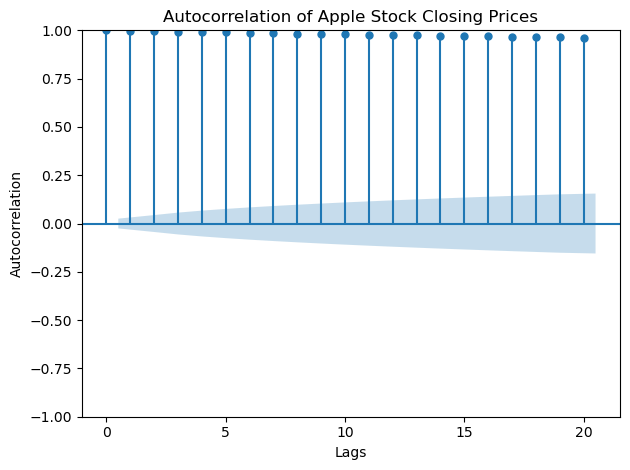

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate autocorrelation and plot ACF
plot_acf(APPL_stocks_df['Close'], lags=20)
plt.title('Autocorrelation of Apple Stock Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.tight_layout()

plt.show()

<Figure size 1000x800 with 0 Axes>

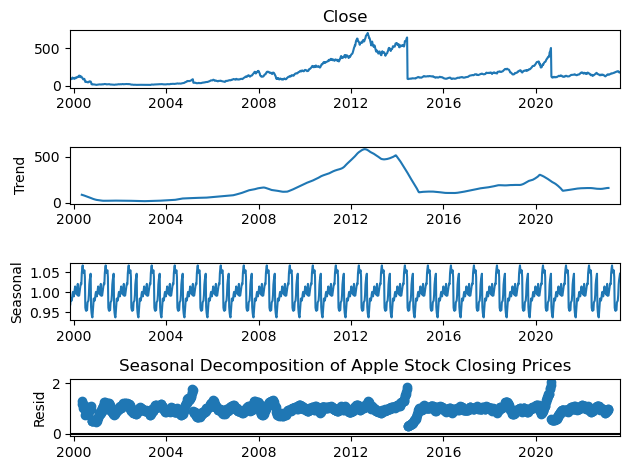

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' is already set as the index in your DataFrame
# Resample data to monthly frequency
resampled_df = APPL_stocks_df['Close'].resample('W').mean()  # You can change 'M' to 'W' for weekly resampling

# Seasonal decomposition
result = seasonal_decompose(resampled_df, model='multiplicative')

# Plot decomposition components
plt.figure(figsize=(10, 8))
result.plot()
plt.title('Seasonal Decomposition of Apple Stock Closing Prices')
plt.tight_layout()

plt.show()